<a href="https://colab.research.google.com/github/Gopi19992005/datascienceproject/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tsds
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.optimizers import Adam

In [ ]:
ds_train, ds_info, = tsds.load('rock_paper_scissors', split='train', with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.7QMBEI_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.7QMBEI_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


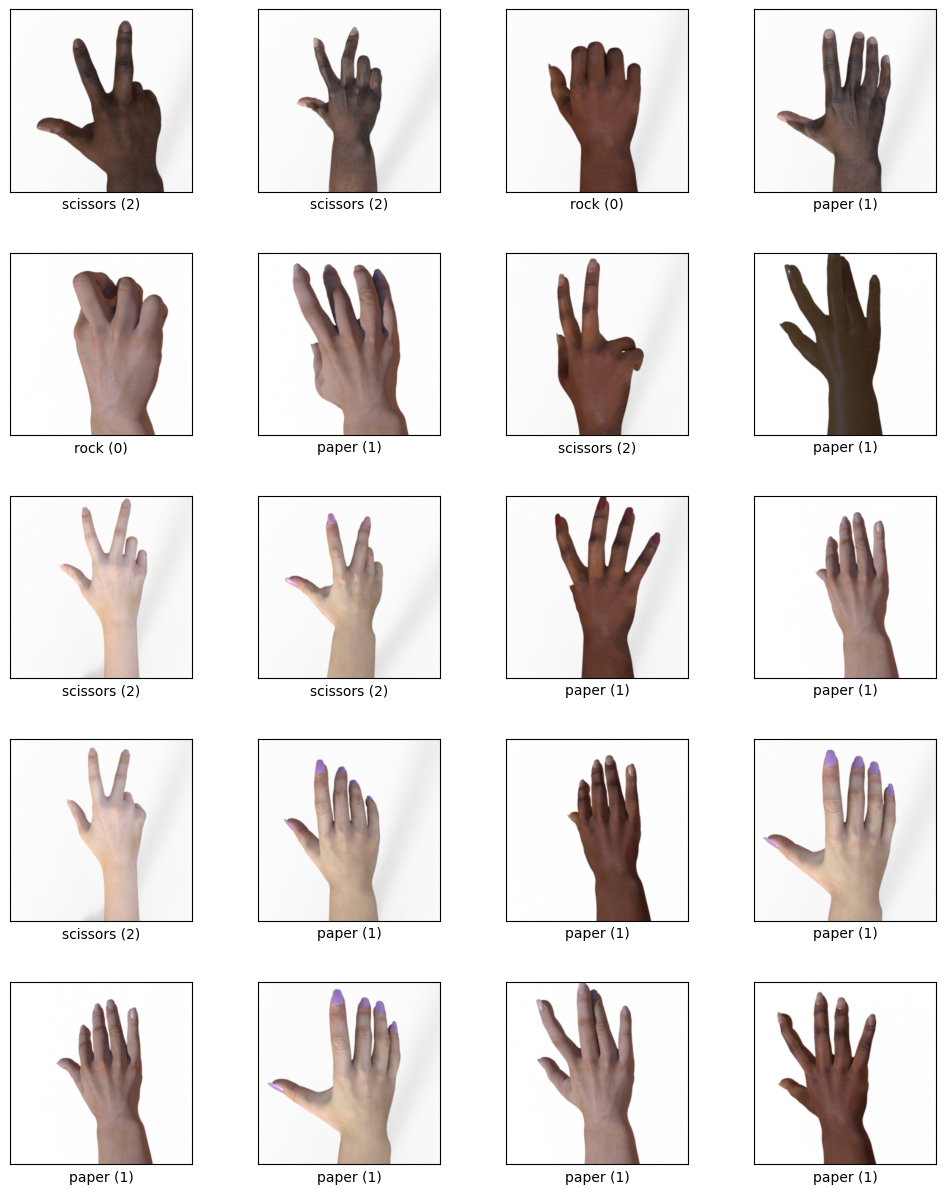

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock

In [ ]:
fig=tsds.show_examples(ds_train, ds_info, rows=5, cols=4)
print(ds_info)

In [ ]:
IMG_HEIGHT=180
IMG_WIDTH=180
BATCH_SIZE=32

def preprocess_image(image, label):
  image=tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
  image=tf.cast(image,tf.float32)/255.0
  return image, label

ds_processed=ds_train.map(preprocess_image)
DATASET_SIZE=ds_info.splits['train'].num_examples
train_size=int(0.8*DATASET_SIZE)
val_size=DATASET_SIZE-train_size
AUTOTUNE = tf.data.AUTOTUNE
ds_shuffled=ds_processed.shuffle(buffer_size=DATASET_SIZE, seed=123)

train_ds=ds_shuffled.take(train_size).batch(BATCH_SIZE).cache().prefetch(buffer_size=AUTOTUNE)
val_ds=ds_shuffled.skip(train_size).batch(BATCH_SIZE).cache().prefetch(buffer_size=AUTOTUNE)

print(f"number of training batches: {len(train_ds)}")
print(f"number of validation batches: {len(val_ds)}")

number of training batches: 63
number of validation batches: 16


In [ ]:
rock=ds_info.features['label'].names
print(rock)

['rock', 'paper', 'scissors']


In [ ]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:

model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len('rock_paper_scissors'))
])

In [ ]:

model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(len('rock_paper_scissors'))
])

In [ ]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len('rock_paper_scissors'))
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=6,validation_data=val_ds)

Epoch 1/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5227 - loss: 1.1581 - val_accuracy: 0.9087 - val_loss: 0.2468
Epoch 2/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9355 - loss: 0.2019 - val_accuracy: 0.9940 - val_loss: 0.0376
Epoch 3/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9558 - loss: 0.1339 - val_accuracy: 0.9921 - val_loss: 0.0307
Epoch 4/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9638 - loss: 0.1204 - val_accuracy: 0.9960 - val_loss: 0.0191
Epoch 5/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9757 - loss: 0.0856 - val_accuracy: 0.9960 - val_loss: 0.0271
Epoch 6/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9743 - loss: 0.0580 - val_accuracy: 0.9960 - val_loss: 0.0238


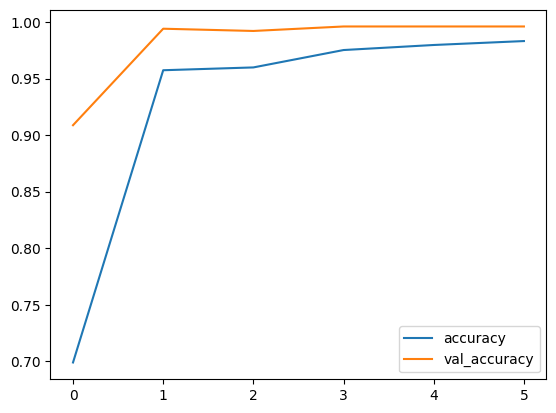

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

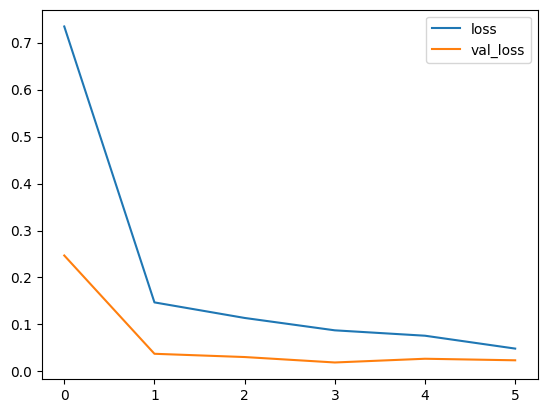

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
base=tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(180,180,3),
    input_tensor=None,
    pooling='avg',
    classes=3,
    classifier_activation='Softmax',
    name="densenet121",
)

In [ ]:
model=Sequential([
    base,
    Flatten(),
    Dense(521,activation='relu'),
    Dropout(0.51),
    Dense(256,activation='relu'),
    Dropout(0.51),
    Dense(3,activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 521)            │       534,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 521)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       133,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,706,189 (29.40 MB)

 Trainable params: 7,622,541 (29.08 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
history=model.fit(train_ds,validation_data=val_ds,epochs=6)

Epoch 1/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 1018s 15s/step - accuracy: 0.6106 - loss: 0.9561 - val_accuracy: 0.9544 - val_loss: 0.1462
Epoch 2/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 911s 14s/step - accuracy: 0.9943 - loss: 0.0327 - val_accuracy: 0.9980 - val_loss: 0.0196
Epoch 3/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 912s 14s/step - accuracy: 0.9982 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 915s 14s/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 893s 14s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 8.2755e-04
Epoch 6/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 929s 14s/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.2883e-04


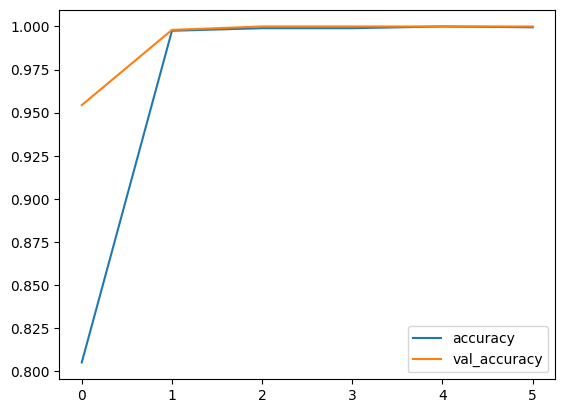

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

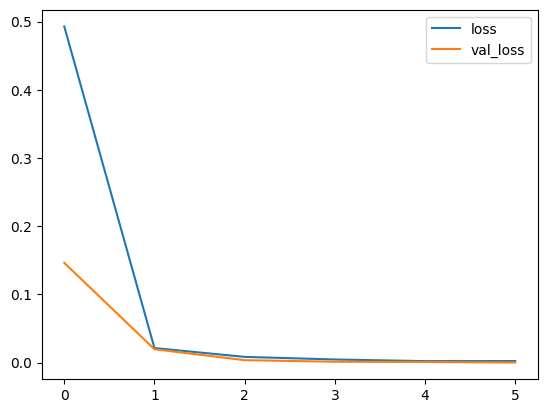

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()